# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 부품가격 조회사이트에서 필요한 정보 파싱
- <a href='http://221.143.43.214/'>스카니아 부품가격 조회</a>
- 브랜드별 SCANIA, HINO 검색정보 리스트 가져오기
- 컬럼정보 : 적용일, 순번, 브랜드, 부품그룹, 부품번호, 부품명(한글), 부품명(영문), 가격(VAT별도)


## 스카니아 부품가격정보 크롤링

In [1]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys

### <font color='brown'>Step1. Device Info 가져오기</font>

In [2]:
# 드라이브 로드
if platform.system() == 'Darwin':    # MacOS
    driver = wd.Chrome(executable_path='./driver/chromedriver')      
elif platform.system() == 'Windows': # Windows
    driver = wd.Chrome(executable_path='./driver/chromedriver.exe')    
else:
    print("It's unknown system. Hangul fonts are not supported!")

In [3]:
target_url = 'http://221.143.43.214/'
brend_keyword = 'SCANIA'    # SCANIA or HINO

In [4]:
# 사이트 접속 (get) : 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
# time.sleep(2)
driver.get(target_url)

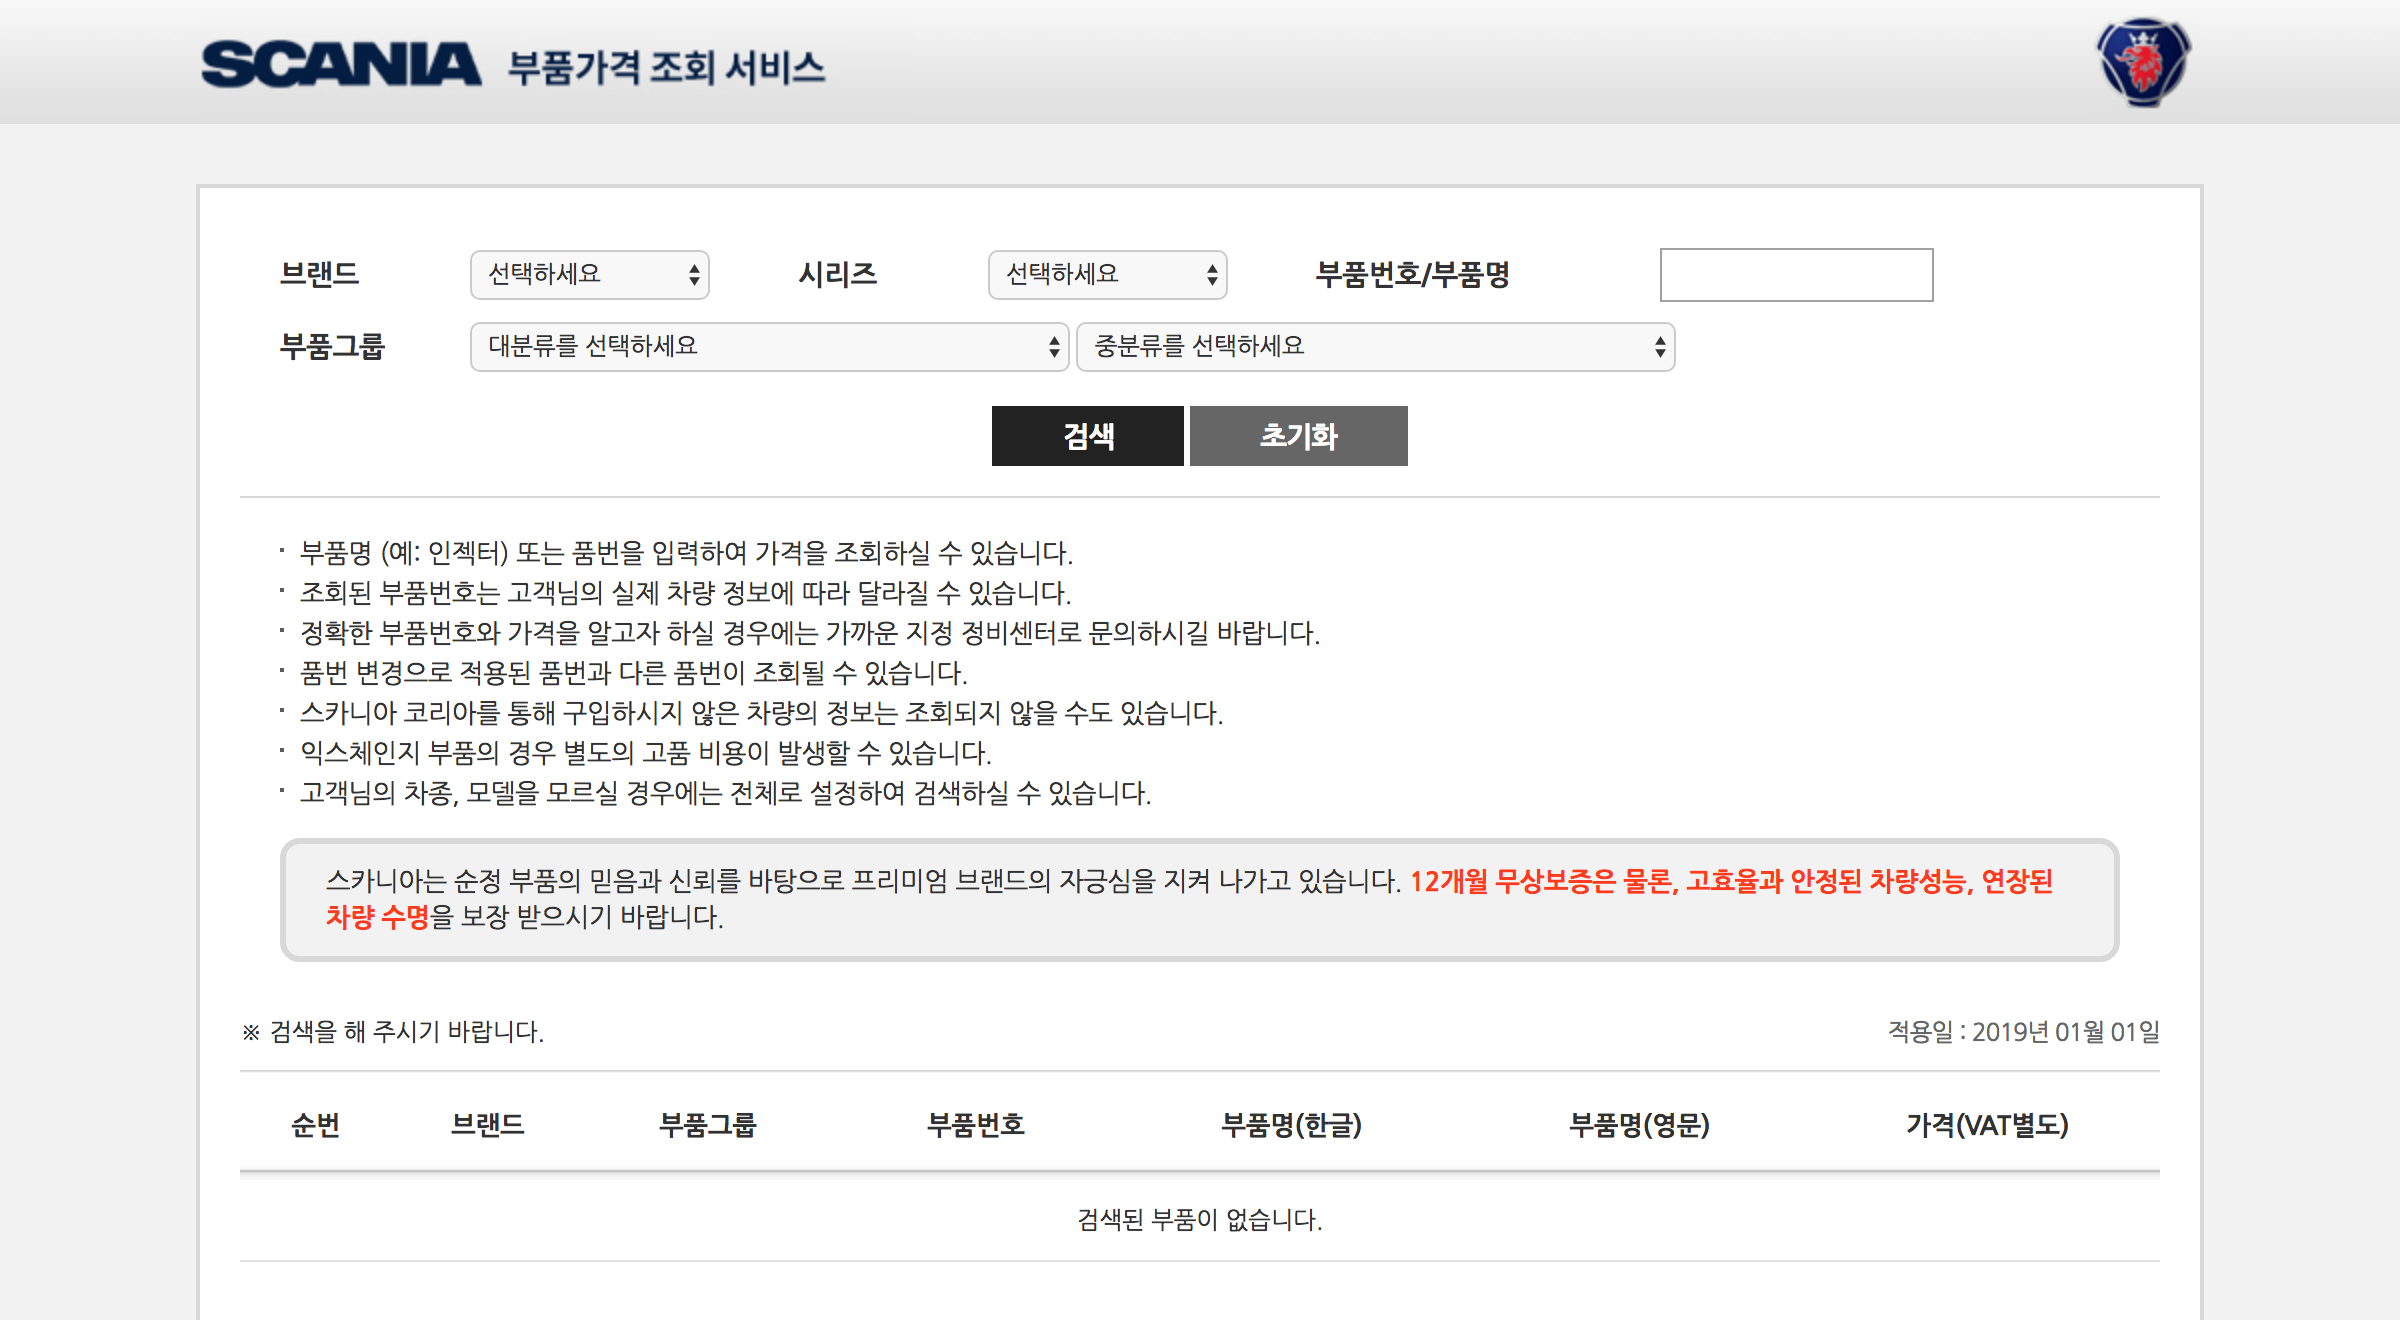

In [5]:
capture_img = './images/scania_site.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [6]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title>스카니아 부품가격 조회 서비스</title>

In [7]:
brend_keyword = 'SCANIA'    # SCANIA or HINO
driver.find_element_by_css_selector('#brend').send_keys(brend_keyword)

In [8]:
# 검색 버튼 클릭
search_btn = '#con2 > div > div.search2 > form > fieldset > table > tbody > tr:nth-child(3) > td > button'
driver.find_element_by_css_selector(search_btn).click()

In [9]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title>스카니아 부품가격 조회 서비스</title>

In [10]:
result_cnt = soup.find('span', 'fcop4').get_text()
result_cnt = int(result_cnt)
result_cnt

24525

In [11]:
last_page = int(result_cnt / 15)
last_page

1635

In [12]:
page_url = 'http://221.143.43.214/index.html?page={}&key=Y&brend={}&series2=&&series3=&part_no=&type1=&type2='
param_page  = last_page
param_brend = 'SCANIA'

In [13]:
driver.get(page_url.format(1, param_brend))

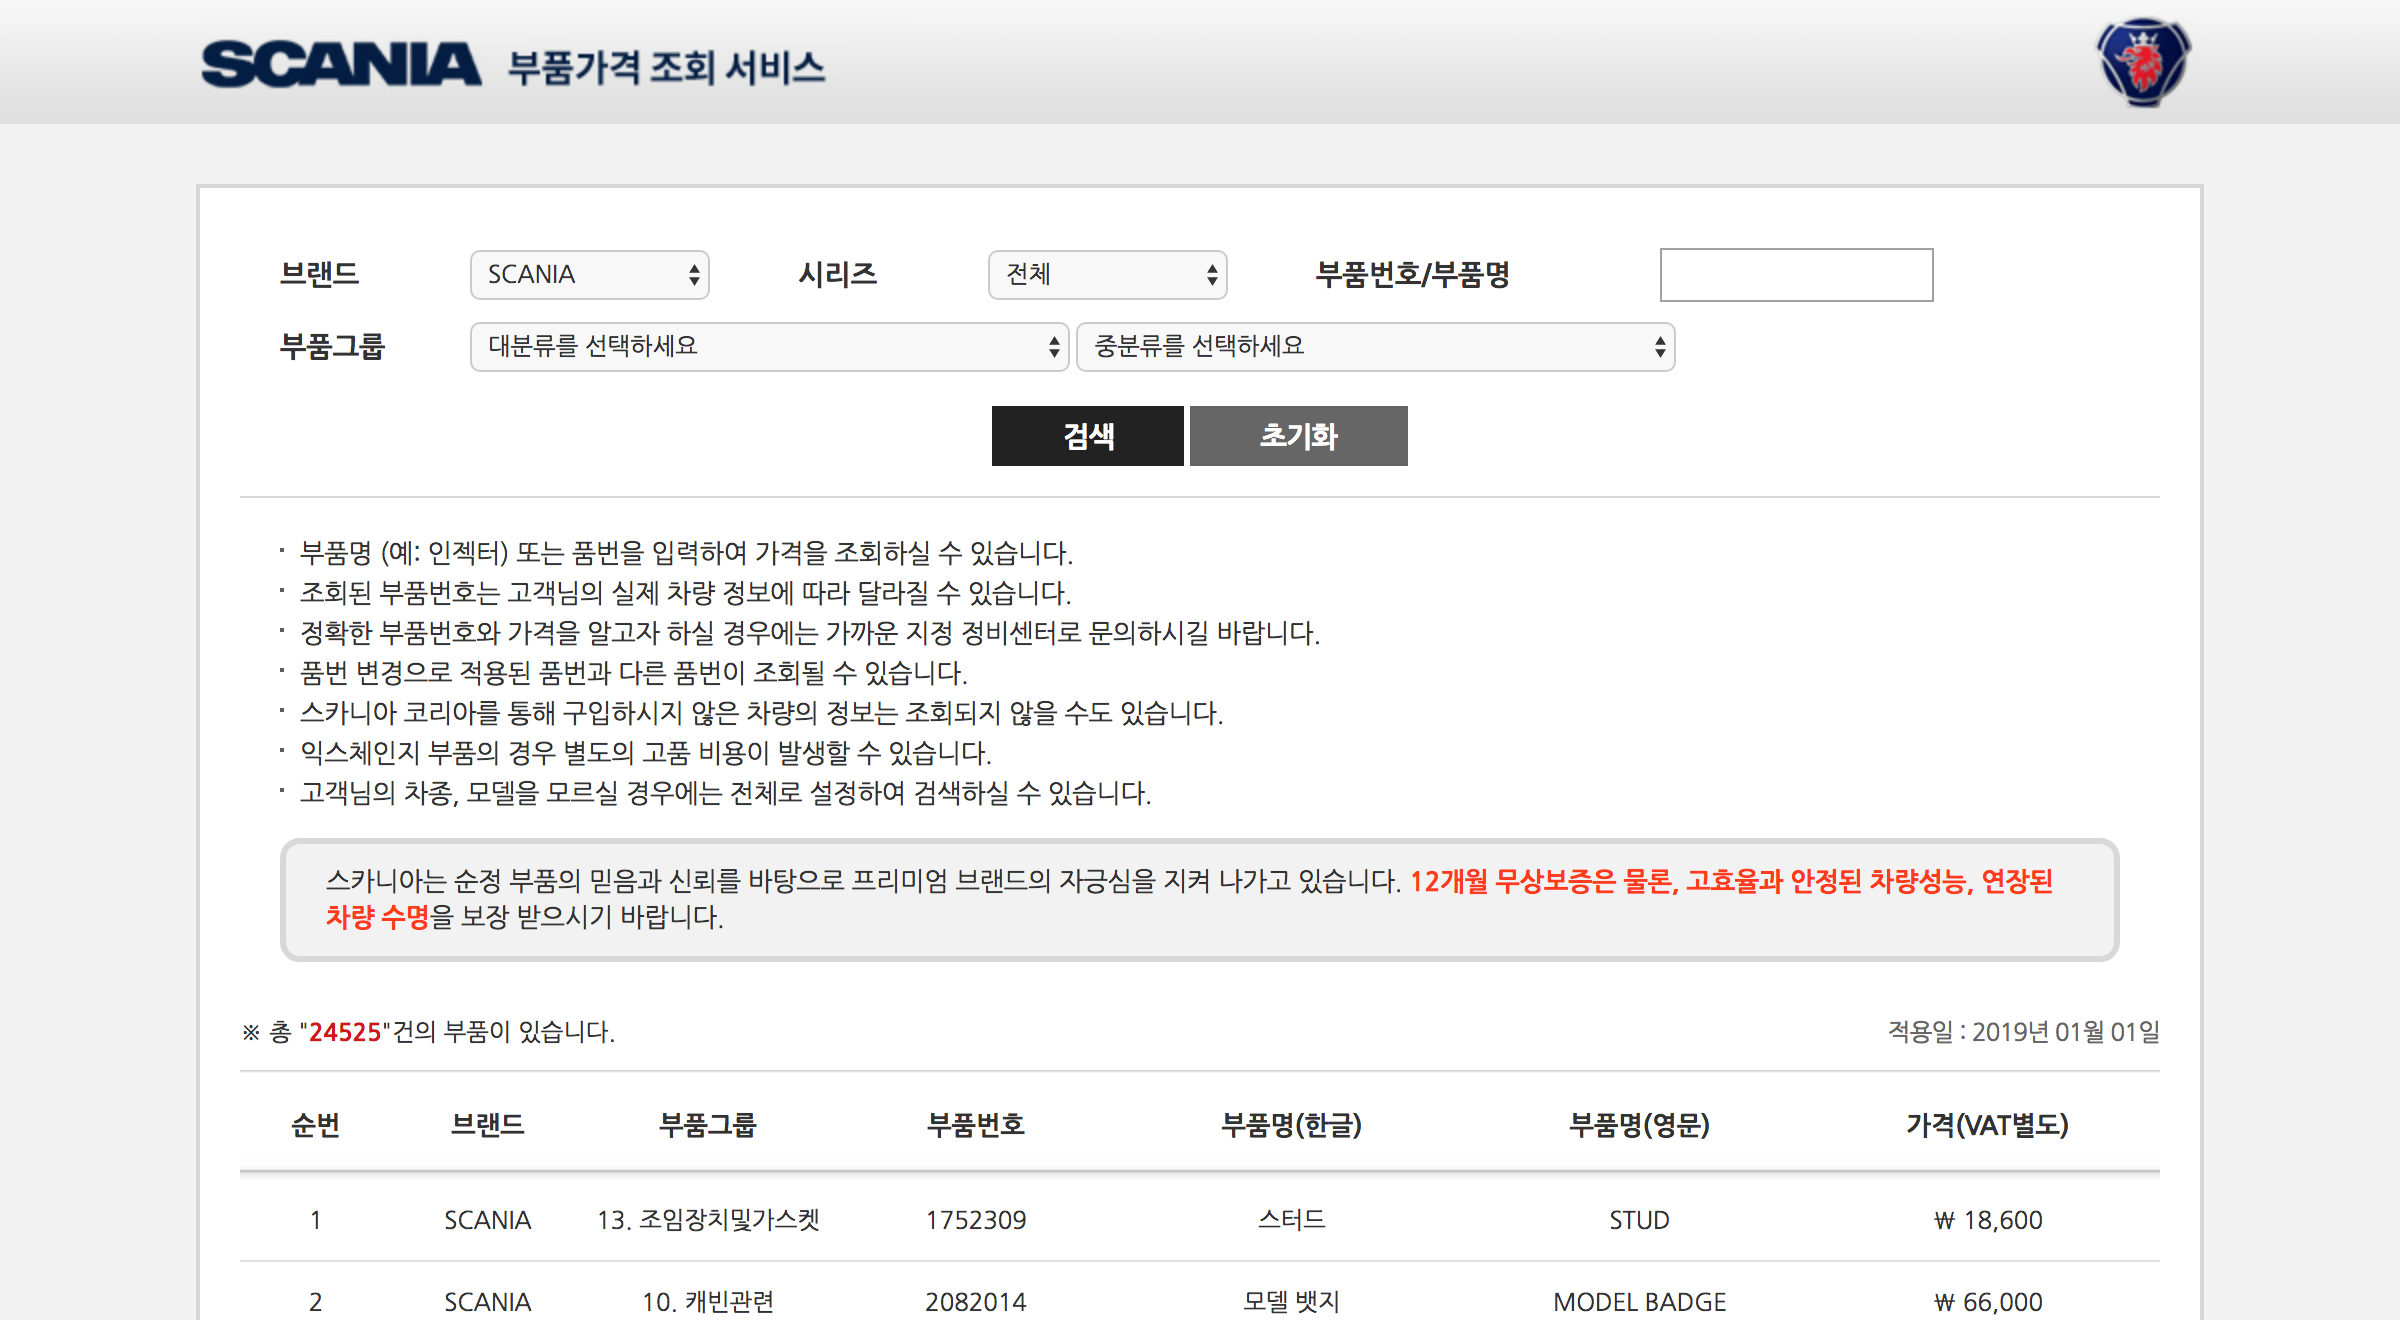

In [14]:
capture_img = './images/scania_site_1.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [15]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title>스카니아 부품가격 조회 서비스</title>

In [16]:
table_tag = soup.find('table', 'tbl2')
table_tag

<table class="tbl2">
<caption>
					검색결과
					</caption>
<colgroup>
<col width="8%"/>
<col width="10%"/>
<col width="13%"/>
<col width="15%"/>
<col width="18%"/>
<col width="*"/>
<col width="18%"/>
</colgroup>
<thead>
<tr>
<th>순번</th>
<th>브랜드</th>
<th>부품그룹</th>
<th>부품번호</th>
<th>부품명(한글)</th>
<th>부품명(영문)</th>
<th>가격(VAT별도)</th>
</tr>
</thead>
<tbody>
<tr>
<td>
									1								</td>
<td>
									SCANIA								</td>
<td>13. 조임장치및가스켓</td>
<td>1752309</td>
<td>스터드</td>
<td>STUD</td>
<!--<td>\18</td>-->
<td>\ 18,600</td>
</tr>
<tr>
<td>
									2								</td>
<td>
									SCANIA								</td>
<td>10. 캐빈관련</td>
<td>2082014</td>
<td>모델 뱃지</td>
<td>MODEL BADGE</td>
<!--<td>\66</td>-->
<td>\ 66,000</td>
</tr>
<tr>
<td>
									3								</td>
<td>
									SCANIA								</td>
<td>3. 연료시스템</td>
<td>1851717</td>
<td>압력 조절장치</td>
<td>PRESSURE REGULATOR</td>
<!--<td>\114</td>-->
<td>\ 114,000</td>
</tr>
<tr>
<td>
									4								</td>
<td>
									SCANIA								</td>
<td>10. 캐빈관련</td>
<td>270

In [17]:
tbody_tag = table_tag.find('tbody')
# tbody_tag

In [18]:
tr_tags = tbody_tag.find_all('tr')
tr_cnt = len(tr_tags)
tr_cnt

15

In [19]:
td_tags = tr_tags[0].find_all('td')
td_cnt = len(td_tags)
td_cnt

7

In [20]:
# 순번, ord_no
td_tags_0 = td_tags[0].get_text()
td_tags_0 = td_tags_0.strip()
td_tags_0

'1'

In [21]:
# 브랜드, brand
td_tags_1 = td_tags[1].get_text()
td_tags_1 = td_tags_1.strip()
td_tags_1

'SCANIA'

In [22]:
# 부품그룹, device_grp
td_tags_2 = td_tags[2].get_text()
td_tags_2 = td_tags_2.strip()
td_tags_2

'13. 조임장치및가스켓'

In [23]:
# 부품번호, device_no
td_tags_3 = td_tags[3].get_text()
td_tags_3 = td_tags_3.strip()
td_tags_3

'1752309'

In [24]:
# 부품명(한글), device_nm_kr
td_tags_4 = td_tags[4].get_text()
td_tags_4 = td_tags_4.strip()
td_tags_4

'스터드'

In [25]:
# 부품명(영문), device_nm_en
td_tags_5 = td_tags[5].get_text()
td_tags_5 = td_tags_5.strip()
td_tags_5

'STUD'

In [26]:
# 가격(VAT별도), price
td_tags_6 = td_tags[6].get_text()
td_tags_6 = td_tags_6.replace(',', '')
td_tags_6 = td_tags_6.replace('\\', '')
td_tags_6 = td_tags_6.strip()
td_tags_6 = int(td_tags_6)
td_tags_6

18600

In [27]:
# 컬럼정보 : 순번, 브랜드, 부품그룹, 부품번호, 부품명(한글), 부품명(영문), 가격(VAT별도)
# Column : ord_no, brand, device_grp, device_no, device_nm_kr, device_nm_en, price

In [28]:
def get_device_info(td_tags):
    device_info = list()
    td_tags_0 = td_tags[0].get_text().strip()    # 순번, ord_no
    td_tags_1 = td_tags[1].get_text().strip()    # 브랜드, brand
    td_tags_2 = td_tags[2].get_text().strip()    # 부품그룹, device_grp
    td_tags_3 = td_tags[3].get_text().strip()    # 부품번호, device_no
    td_tags_4 = td_tags[4].get_text().strip()    # 부품명(한글), device_nm_kr
    td_tags_5 = td_tags[5].get_text().strip()    # 부품명(영문), device_nm_en
    td_tags_6 = td_tags[6].get_text().strip()    # 가격(VAT별도), price
    td_tags_6 = td_tags_6.replace(',' , '')
    td_tags_6 = td_tags_6.replace('\\', '')
    td_tags_6 = td_tags_6.strip()
    
    # 숫자형
    td_tags_0 = int(td_tags_0)
    td_tags_6 = int(td_tags_6)
    
    device_info.append(td_tags_0)
    device_info.append(td_tags_1)
    device_info.append(td_tags_2)
    device_info.append(td_tags_3)
    device_info.append(td_tags_4)
    device_info.append(td_tags_5)
    device_info.append(td_tags_6)
    
    return device_info


In [29]:
device_info = get_device_info(td_tags)
device_info

[1, 'SCANIA', '13. 조임장치및가스켓', '1752309', '스터드', 'STUD', 18600]

In [30]:
def get_device_info(td_tags):
    device_info = dict()
    td_tags_0 = td_tags[0].get_text().strip()    # 순번, ord_no
    td_tags_1 = td_tags[1].get_text().strip()    # 브랜드, brand
    td_tags_2 = td_tags[2].get_text().strip()    # 부품그룹, device_grp
    td_tags_3 = td_tags[3].get_text().strip()    # 부품번호, device_no
    td_tags_4 = td_tags[4].get_text().strip()    # 부품명(한글), device_nm_kr
    td_tags_5 = td_tags[5].get_text().strip()    # 부품명(영문), device_nm_en
    td_tags_6 = td_tags[6].get_text().strip()    # 가격(VAT별도), price
    td_tags_6 = td_tags_6.replace(',', '')
    td_tags_6 = td_tags_6.replace('\\', '')
    td_tags_6 = td_tags_6.strip()
    
    # 숫자형
    td_tags_0 = int(td_tags_0)
    td_tags_6 = int(td_tags_6)
    
    
    device_info['ord_no'      ] = td_tags_0
    device_info['brand'       ] = td_tags_1
    device_info['device_grp'  ] = td_tags_2
    device_info['device_no'   ] = td_tags_3
    device_info['device_nm_kr'] = td_tags_4
    device_info['device_nm_en'] = td_tags_5
    device_info['price'       ] = td_tags_6
    
    return device_info


In [31]:
device_info = get_device_info(td_tags)
device_info

{'ord_no': 1,
 'brand': 'SCANIA',
 'device_grp': '13. 조임장치및가스켓',
 'device_no': '1752309',
 'device_nm_kr': '스터드',
 'device_nm_en': 'STUD',
 'price       ': 18600}

### <font color='brown'>Step2. Device List 가져오기</font>

In [32]:
tr_tags = tbody_tag.find_all('tr')
tr_cnt = len(tr_tags)
tr_cnt

15

In [33]:
td_tags = tr_tags[0].find_all('td')
td_cnt = len(td_tags)
td_cnt

7

In [35]:
def get_device_list(tr_tags):
    device_list = list()
    
    tr_cnt = len(tr_tags)
    if tr_cnt == 0:
        return 
    
    for i in range(tr_cnt):
        td_tags = tr_tags[i].find_all('td')
        device_info = get_device_info(td_tags)
        device_list.append(device_info)
    
    return device_list


In [36]:
device_list = get_device_list(tr_tags)
device_list

[{'ord_no': 1,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '1752309',
  'device_nm_kr': '스터드',
  'device_nm_en': 'STUD',
  'price       ': 18600},
 {'ord_no': 2,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2082014',
  'device_nm_kr': '모델 뱃지',
  'device_nm_en': 'MODEL BADGE',
  'price       ': 66000},
 {'ord_no': 3,
  'brand': 'SCANIA',
  'device_grp': '3. 연료시스템',
  'device_no': '1851717',
  'device_nm_kr': '압력 조절장치',
  'device_nm_en': 'PRESSURE REGULATOR',
  'price       ': 114000},
 {'ord_no': 4,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2706288',
  'device_nm_kr': '뱃지',
  'device_nm_en': 'BADGE',
  'price       ': 63000},
 {'ord_no': 5,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '2351872',
  'device_nm_kr': '호스',
  'device_nm_en': 'HOSE',
  'price       ': 132000},
 {'ord_no': 6,
  'brand': 'SCANIA',
  'device_grp': '7. 샤시관련',
  'device_no': '2277633',
  'device_nm_kr': '리덕던트 호스',
  'device_n

### <font color='brown'>Step3. 페이지별 Device List 가져오기</font>

In [ ]:
def get_device_list(tr_tags):
    device_list = list()
    
    tr_cnt = len(tr_tags)
    if tr_cnt == 0:
        return None
    
    for i in range(tr_cnt):
        td_tags = tr_tags[i].find_all('td')
        device_info = get_device_info(td_tags)
        device_list.append(device_info)
    
    return device_list


In [54]:
def get_device_list_by_page(start_pg, end_pg):
    device_list_total = list()
    
    page_url = 'http://221.143.43.214/index.html?page={}&key=Y&brend={}&series2=&&series3=&part_no=&type1=&type2='
    
    for navi_page in range(start_pg, end_pg+1):
        param_page  = navi_page
        param_brend = 'SCANIA'
        driver.get(page_url.format(param_page, param_brend))
        
        time.sleep(1)
        html = driver.page_source
        soup = bs(html, "lxml")
        
        table_tag = soup.find('table', 'tbl2')
        tbody_tag = table_tag.find('tbody')
        tr_tags = tbody_tag.find_all('tr')
        tr_cnt = len(tr_tags)
        
        if tr_cnt > 0:
            device_list = list()
        else:
            break
        
        device_list = get_device_list(tr_tags)
        
        device_list_total.extend(device_list)
    
    return device_list_total


In [55]:
device_list_total = get_device_list_by_page(1, 10)
len(device_list_total)

150

In [56]:
device_list_total

[{'ord_no': 1,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '1752309',
  'device_nm_kr': '스터드',
  'device_nm_en': 'STUD',
  'price       ': 18600},
 {'ord_no': 2,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2082014',
  'device_nm_kr': '모델 뱃지',
  'device_nm_en': 'MODEL BADGE',
  'price       ': 66000},
 {'ord_no': 3,
  'brand': 'SCANIA',
  'device_grp': '3. 연료시스템',
  'device_no': '1851717',
  'device_nm_kr': '압력 조절장치',
  'device_nm_en': 'PRESSURE REGULATOR',
  'price       ': 114000},
 {'ord_no': 4,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2706288',
  'device_nm_kr': '뱃지',
  'device_nm_en': 'BADGE',
  'price       ': 63000},
 {'ord_no': 5,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '2351872',
  'device_nm_kr': '호스',
  'device_nm_en': 'HOSE',
  'price       ': 132000},
 {'ord_no': 6,
  'brand': 'SCANIA',
  'device_grp': '7. 샤시관련',
  'device_no': '2277633',
  'device_nm_kr': '리덕던트 호스',
  'device_n

### <font color='brown'>Step4. 페이지별 Device List 저장하기</font>

In [57]:
# 컬럼정보 : 순번, 브랜드, 부품그룹, 부품번호, 부품명(한글), 부품명(영문), 가격(VAT별도)
# Column : ord_no, brand, device_grp, device_no, device_nm_kr, device_nm_en, price

In [72]:
import csv

csv_columns = [ 'ord_no', 'brand', 'device_grp', 'device_no', 'device_nm_kr', 'device_nm_en', 'price' ]
dict_data = [
     {'ord_no': 1,
      'brand': 'SCANIA',
      'device_grp': '13. 조임장치및가스켓',
      'device_no': '1752309',
      'device_nm_kr': '스터드',
      'device_nm_en': 'STUD',
      'price': 18600},
     {'ord_no': 2,
      'brand': 'SCANIA',
      'device_grp': '10. 캐빈관련',
      'device_no': '2082014',
      'device_nm_kr': '모델 뱃지',
      'device_nm_en': 'MODEL BADGE',
      'price': 66000},
     {'ord_no': 3,
      'brand': 'SCANIA',
      'device_grp': '3. 연료시스템',
      'device_no': '1851717',
      'device_nm_kr': '압력 조절장치',
      'device_nm_en': 'PRESSURE REGULATOR',
      'price': 114000},
]
# dict_data = device_list_total

csv_file = 'data/scania_test.csv'
try:
    with open(csv_file, 'w', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error") 
    

In [74]:
df = pd.read_csv(csv_file)
df.head()

,ord_no,brand,device_grp,device_no,device_nm_kr,device_nm_en,price
0,1,SCANIA,13. 조임장치및가스켓,1752309,스터드,STUD,18600
1,2,SCANIA,10. 캐빈관련,2082014,모델 뱃지,MODEL BADGE,66000
2,3,SCANIA,3. 연료시스템,1851717,압력 조절장치,PRESSURE REGULATOR,114000


### <font color='brown'>Step5. 모듈기반 Scania 데이터 크롤링</font>

In [2]:
# from images import bigpycraft_dl as bpc
from module import bl_dc_scania as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

In [3]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys

``` python

target_url = 'http://221.143.43.214/'
brend_keyword = 'SCANIA'    # SCANIA or HINO

driver.get(target_url)
capture_img = './images/scania_site.png'
driver.save_screenshot(capture_img)
Image(capture_img)

html = driver.page_source
soup = bs(html, "lxml")
soup.title

brend_keyword = 'SCANIA'    # SCANIA or HINO
driver.find_element_by_css_selector('#brend').send_keys(brend_keyword)

# 검색 버튼 클릭
search_btn = '#con2 > div > div.search2 > form > fieldset > table > tbody > tr:nth-child(3) > td > button'
driver.find_element_by_css_selector(search_btn).click()

html = driver.page_source
soup = bs(html, "lxml")
soup.title

result_cnt = soup.find('span', 'fcop4').get_text()
result_cnt = int(result_cnt)
result_cnt
```


In [14]:
# 드라이브 로드
if platform.system() == 'Darwin':    # MacOS
    driver = wd.Chrome(executable_path='./driver/chromedriver')      
elif platform.system() == 'Windows': # Windows
    driver = wd.Chrome(executable_path='./driver/chromedriver.exe')    
else:
    print("It's unknown system. Hangul fonts are not supported!")

In [15]:
def ready_crawling():

    target_url = 'http://221.143.43.214/'
    brend_keyword = 'SCANIA'    # SCANIA or HINO

    driver.get(target_url)
    capture_img = './images/scania_site.png'
    driver.save_screenshot(capture_img)
    Image(capture_img)

    html = driver.page_source
    soup = bs(html, "lxml")
    soup.title

    brend_keyword = 'SCANIA'    # SCANIA or HINO
    driver.find_element_by_css_selector('#brend').send_keys(brend_keyword)

    # 검색 버튼 클릭
    search_btn = '#con2 > div > div.search2 > form > fieldset > table > tbody > tr:nth-child(3) > td > button'
    driver.find_element_by_css_selector(search_btn).click()

    html = driver.page_source
    soup = bs(html, "lxml")
    soup.title

    result_cnt = soup.find('span', 'fcop4').get_text()
    result_cnt = int(result_cnt)
    result_cnt
    
    return result_cnt

In [16]:
result_cnt = ready_crawling()
result_cnt

24525

In [17]:
last_page = result_cnt / 15
last_page = int(last_page)
last_page

1635

In [18]:
def get_device_info(td_tags):
    device_info = dict()
    td_tags_0 = td_tags[0].get_text().strip()    # 순번, ord_no
    td_tags_1 = td_tags[1].get_text().strip()    # 브랜드, brand
    td_tags_2 = td_tags[2].get_text().strip()    # 부품그룹, device_grp
    td_tags_3 = td_tags[3].get_text().strip()    # 부품번호, device_no
    td_tags_4 = td_tags[4].get_text().strip()    # 부품명(한글), device_nm_kr
    td_tags_5 = td_tags[5].get_text().strip()    # 부품명(영문), device_nm_en
    td_tags_6 = td_tags[6].get_text().strip()    # 가격(VAT별도), price
    td_tags_6 = td_tags_6.replace(',', '')
    td_tags_6 = td_tags_6.replace('\\', '')
    td_tags_6 = td_tags_6.strip()
    
    # 숫자형
    td_tags_0 = int(td_tags_0)
    td_tags_6 = int(td_tags_6)
    
    
    device_info['ord_no'      ] = td_tags_0
    device_info['brand'       ] = td_tags_1
    device_info['device_grp'  ] = td_tags_2
    device_info['device_no'   ] = td_tags_3
    device_info['device_nm_kr'] = td_tags_4
    device_info['device_nm_en'] = td_tags_5
    device_info['price'       ] = td_tags_6
    
    return device_info


In [19]:
def get_device_list(tr_tags):
    device_list = list()
    
    tr_cnt = len(tr_tags)
    if tr_cnt == 0:
        return 
    
    for i in range(tr_cnt):
        td_tags = tr_tags[i].find_all('td')
        device_info = get_device_info(td_tags)
        device_list.append(device_info)
    
    return device_list


In [25]:
def get_device_list_by_page(start_pg, end_pg):
    device_list_total = list()
    
    page_url = 'http://221.143.43.214/index.html?page={}&key=Y&brend={}&series2=&&series3=&part_no=&type1=&type2='
    
    for navi_page in range(start_pg, end_pg+1):
        param_page  = navi_page
        param_brend = 'SCANIA'
        driver.get(page_url.format(param_page, param_brend))
        
        time.sleep(1)
        html = driver.page_source
        soup = bs(html, "lxml")
        
        table_tag = soup.find('table', 'tbl2')
        tbody_tag = table_tag.find('tbody')
        tr_tags = tbody_tag.find_all('tr')
        tr_cnt = len(tr_tags)
        
        if tr_cnt > 0:
            device_list = list()
        else:
            break
        
        device_list = get_device_list(tr_tags)
        device_list_total.extend(device_list)
        
        if navi_page > 0:
            print('{} page is crawling !!'.format(navi_page))
    
    return device_list_total


In [26]:
import csv

def save_dict_to_csv(device_list_total, filename='scania_data.csv'):
    csv_columns = [ 'ord_no', 'brand', 'device_grp', 'device_no', 'device_nm_kr', 'device_nm_en', 'price' ]
    dict_data = device_list_total

    csv_file = 'data/' + filename

    try:
        with open(csv_file, 'w', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in dict_data:
                writer.writerow(data)
    except IOError:
        print("I/O error") 
    

In [27]:
device_list_total = get_device_list_by_page(1, 100)
device_list_total

1 page is crawling !!
2 page is crawling !!
3 page is crawling !!
4 page is crawling !!
5 page is crawling !!
6 page is crawling !!
7 page is crawling !!
8 page is crawling !!
9 page is crawling !!
10 page is crawling !!
11 page is crawling !!
12 page is crawling !!
13 page is crawling !!
14 page is crawling !!
15 page is crawling !!
16 page is crawling !!
17 page is crawling !!
18 page is crawling !!
19 page is crawling !!
20 page is crawling !!
21 page is crawling !!
22 page is crawling !!
23 page is crawling !!
24 page is crawling !!
25 page is crawling !!
26 page is crawling !!
27 page is crawling !!
28 page is crawling !!
29 page is crawling !!
30 page is crawling !!
31 page is crawling !!
32 page is crawling !!
33 page is crawling !!
34 page is crawling !!
35 page is crawling !!
36 page is crawling !!
37 page is crawling !!
38 page is crawling !!
39 page is crawling !!
40 page is crawling !!
41 page is crawling !!
42 page is crawling !!
43 page is crawling !!
44 page is crawling 

[{'ord_no': 1,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '1752309',
  'device_nm_kr': '스터드',
  'device_nm_en': 'STUD',
  'price': 18600},
 {'ord_no': 2,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2082014',
  'device_nm_kr': '모델 뱃지',
  'device_nm_en': 'MODEL BADGE',
  'price': 66000},
 {'ord_no': 3,
  'brand': 'SCANIA',
  'device_grp': '3. 연료시스템',
  'device_no': '1851717',
  'device_nm_kr': '압력 조절장치',
  'device_nm_en': 'PRESSURE REGULATOR',
  'price': 114000},
 {'ord_no': 4,
  'brand': 'SCANIA',
  'device_grp': '10. 캐빈관련',
  'device_no': '2706288',
  'device_nm_kr': '뱃지',
  'device_nm_en': 'BADGE',
  'price': 63000},
 {'ord_no': 5,
  'brand': 'SCANIA',
  'device_grp': '13. 조임장치및가스켓',
  'device_no': '2351872',
  'device_nm_kr': '호스',
  'device_nm_en': 'HOSE',
  'price': 132000},
 {'ord_no': 6,
  'brand': 'SCANIA',
  'device_grp': '7. 샤시관련',
  'device_no': '2277633',
  'device_nm_kr': '리덕던트 호스',
  'device_nm_en': 'REDUCTANT HOSE',
  'price':

In [28]:
filename='scania_data.csv'
save_dict_to_csv(device_list_total, filename)

In [29]:
# check data
csv_file = 'data/' + filename
df_scania = pd.read_csv(csv_file)
df_scania

,ord_no,brand,device_grp,device_no,device_nm_kr,device_nm_en,price
0,1,SCANIA,13. 조임장치및가스켓,1752309,스터드,STUD,18600
1,2,SCANIA,10. 캐빈관련,2082014,모델 뱃지,MODEL BADGE,66000
2,3,SCANIA,3. 연료시스템,1851717,압력 조절장치,PRESSURE REGULATOR,114000
3,4,SCANIA,10. 캐빈관련,2706288,뱃지,BADGE,63000
4,5,SCANIA,13. 조임장치및가스켓,2351872,호스,HOSE,132000
5,6,SCANIA,7. 샤시관련,2277633,리덕던트 호스,REDUCTANT HOSE,411000
6,7,SCANIA,14. 차량액세서리,1946296,FIFTH WHEEL LAMP,FIFTH WHEEL LAMP,108000
7,8,SCANIA,14. 차량액세서리,2728643,디스플레이,DISPLAY,193000
8,9,SCANIA,2. 냉각시스템,1801176,호스,HOSE,26300
9,10,SCANIA,13. 조임장치및가스켓,2298124,브라켓,BRACKET,94000


### UTF-8 한글 CSV파일 Office에서 제대로 읽기 
> https://www.lesstif.com/pages/viewpage.action?pageId=54952504
- 엑셀을 실행하고 데이타 → 텍스트 를 선택합니다.
- 가져올 파일을 선택하고 확인을 클릭합니다.
- 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다.